<a href="https://colab.research.google.com/github/lilasu086/Fetch/blob/main/Fetch_Data_Analyst_Take_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applicant: Yu-Chun(Lila) Su

Email: lilasu@bu.edu

GitHub: https://github.com/lilasu086

LinkedIn: https://www.linkedin.com/in/yu-chun-su

## First: explore the data

**Qustion:**

Review the unstructured csv files and answer the following questions with code that supports your conclusions:
*   Are there any data quality issues present?
*   Are there any fields that are challenging to understand?

In [1]:
# Skip warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data
import pandas as pd

users_url = "https://fetch-hiring.s3.amazonaws.com/data-analyst/da_take_home/USER_TAKEHOME.csv"
transactions_url = "https://fetch-hiring.s3.amazonaws.com/data-analyst/da_take_home/TRANSACTION_TAKEHOME.csv"
products_url = "https://fetch-hiring.s3.amazonaws.com/data-analyst/da_take_home/PRODUCTS_TAKEHOME.csv"

users_df = pd.read_csv(users_url)
transactions_df = pd.read_csv(transactions_url)
products_df = pd.read_csv(products_url)

In [3]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [5]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [6]:
# Get basic info about three tables
print(users_df.info())
print()
print(transactions_df.info())
print()
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-nu

**Note**

Based on the analysis, I identified data type inconsistencies in several columns, which could impact data processing and analysis. Specifically:  

- Date-related columns should be in **DATETIME** format instead of **object** to enable proper time-based analysis.  
- **Final sale** and **final quantity** should be **float** rather than **object** to allow for accurate numerical calculations.  

Upon examining the **final quantity** column, I found a mix of **float** and **string** values, which could lead to issues in computations and aggregations. Standardizing these data types is essential to ensure data integrity and facilitate further analysis.

In [7]:
# Check duplications
duplicate_users = users_df.duplicated().sum()
print(duplicate_users)
duplicate_transactions = transactions_df.duplicated().sum()
print(duplicate_transactions)
duplicate_products = products_df.duplicated().sum()
print(duplicate_products)

0
171
215


**Note**

There are duplicate entries in the **transaction** and **product** tables. To ensure accuracy in further analysis, we should remove these duplicates to prevent potential inconsistencies.

In [8]:
# Check missing values
mvalue_users = users_df.isna().sum()
print(mvalue_users)
print()
mvalue_transactions = transactions_df.isna().sum()
print(mvalue_transactions)
print()
mvalue_products = products_df.isna().sum()
print(mvalue_products)
print()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64



In [9]:
!pip install missingno

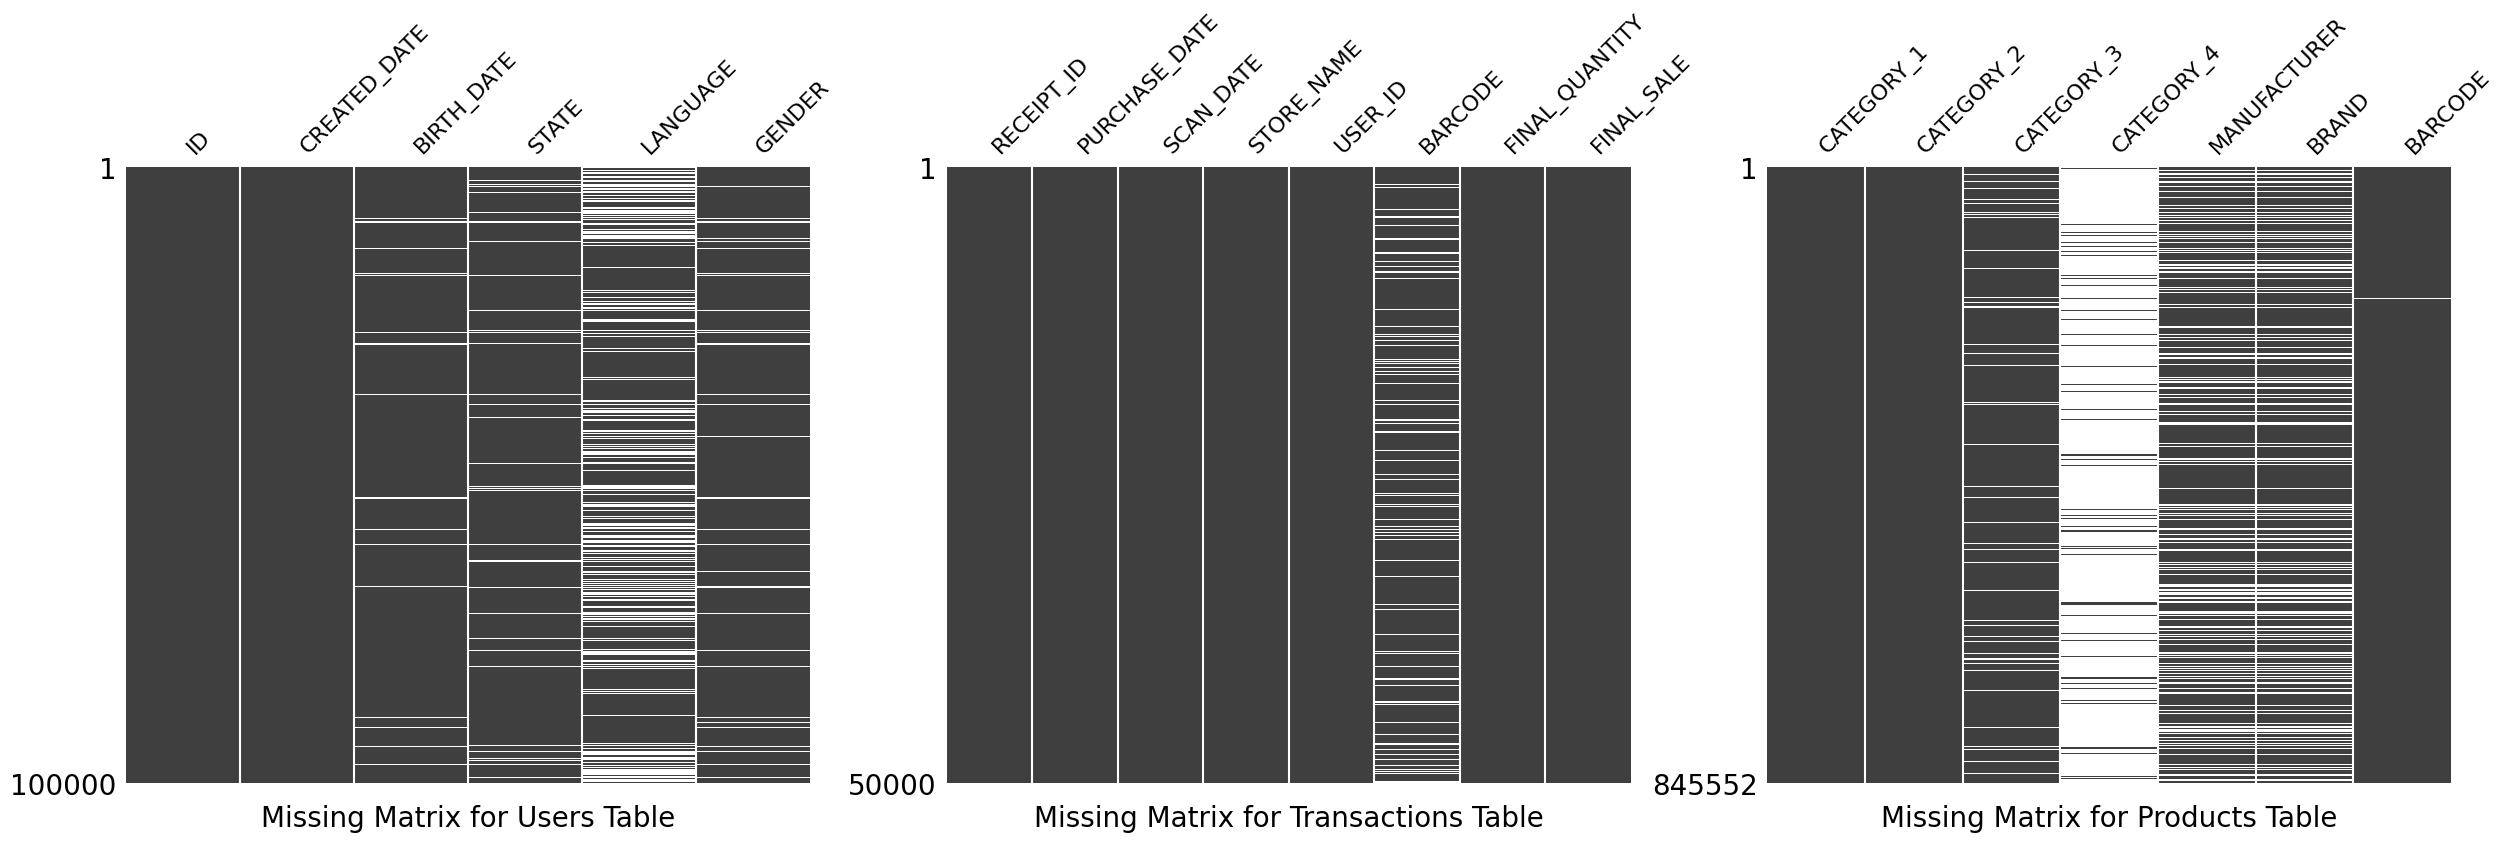

In [10]:
# Plot missing values
import missingno as msno
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(30, 8))

msno.matrix(users_df, ax=axes[0])
axes[0].set_xlabel("Missing Matrix for Users Table", fontsize=20, labelpad=15)

msno.matrix(transactions_df, ax=axes[1])
axes[1].set_xlabel("Missing Matrix for Transactions Table", fontsize=20, labelpad=15)

msno.matrix(products_df, ax=axes[2])
axes[2].set_xlabel("Missing Matrix for Products Table", fontsize=20, labelpad=15)

plt.show();

**Note**

To check for missing values, I plotted a matrix to visualize each column clearly. There are numerous missing values across all tables, especially in the **product** table. This could lead to an imbalanced shopping analysis, as we may need to drop rows with missing data.

**Answer:**

**Data Quality Issues:**  
The analysis revealed several data quality concerns:  
- **Data Type Inconsistencies**: Many columns are incorrectly classified as **object** instead of their appropriate types, which can hinder proper analysis. For example:

  - Date-related columns should be converted to **DATETIME** to enable accurate time-based analysis.
  - **Final sale** and **final quantity** should be **float** instead of **object** for proper numerical calculations.
  - The **final quantity** column contains a mix of **float** and **string** values, which complicates computations and requires standardization.

- **Duplicate Entries:** The **transaction** and **product** tables contain duplicate records, which could lead to incorrect insights if not removed.  
- **Missing Values:** A significant number of missing values exist across all tables, particularly in the **product** table. This may cause imbalanced shopping analysis, as dropping missing data could reduce data completeness.

**Fields That Are Challenging to Understand:**  
- In the **product** table, there are four columns named **"category"**, which creates confusion. This inconsistent naming makes it difficult to determine where a specific category belongs. During analysis, I must check multiple category columns to ensure a category is not misplaced, which is inefficient and time-consuming. Standardizing or renaming these columns would improve clarity and ease of use.  

To enhance data reliability, I recommend correcting data types, removing duplicates, handling missing values appropriately, and improving column naming conventions.

## Second: provide SQL queries

**Qustion:**

Answer three of the following questions with at least one question coming from the closed-ended and one from the open-ended question set. Each question should be answered using one query.

**Closed-ended questions:**
*   What are the top 5 brands by receipts scanned among users 21 and over?
*   What are the top 5 brands by sales among users that have had their account for at least six months?
*   What is the percentage of sales in the Health & Wellness category by generation?

**Open-ended questions:** for these, make assumptions and clearly state them when answering the question.
*   Who are Fetch’s power users?
*   Which is the leading brand in the Dips & Salsa category?
*   At what percent has Fetch grown year over year?

In [11]:
import sqlite3

In [ ]:
# Build database to store tables
conn1 = sqlite3.connect("fetch_database.db")

users_df.to_sql("users_df", conn1, index=False, if_exists="replace")
transactions_df.to_sql("transactions_df", conn1, index=False, if_exists="replace")
products_df.to_sql("products_df", conn1, index=False, if_exists="replace")

### **Query1: What are the top 5 brands by receipts scanned among users 21 and over?**

In [13]:
query1 = """
WITH rank_df AS (
    SELECT BRAND, COUNT(RECEIPT_ID) AS RECEIPT_COUNT,
           RANK() OVER (ORDER BY COUNT(RECEIPT_ID) DESC) AS RANK
    FROM transactions_df AS T
    LEFT JOIN products_df AS P ON T.BARCODE = P.BARCODE
    LEFT JOIN (
        SELECT ID,
            CAST(
                (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE))
                - (strftime('%m-%d', 'now') < strftime('%m-%d', BIRTH_DATE))
            AS INTEGER) AS AGE
        FROM users_df
    ) AS U ON T.USER_ID = U.ID
    WHERE AGE >= 21 AND BRAND IS NOT NULL
    GROUP BY BRAND
)

SELECT BRAND, RECEIPT_COUNT
FROM rank_df
WHERE RANK <= 5;
"""

In [14]:
result1 = pd.read_sql(query1, con=conn1)
print(result1)

             BRAND  RECEIPT_COUNT
0      NERDS CANDY              6
1             DOVE              6
2          TRIDENT              4
3  SOUR PATCH KIDS              4
4           MEIJER              4
5        HERSHEY'S              4
6      GREAT VALUE              4
7        COCA-COLA              4


**Answer**

To answer the question, I needed to select the **top 5 brands** based on receipt counts. Initially, when sorting the brands, I noticed that the receipt counts for ranks 3, 4, and 5 were the same. To verify whether this pattern continued, I found that six brands had four receipts each.  

To ensure that all brands with the same receipt count were included, I used **ranking** instead of limiting the selection to five brands arbitrarily. As a result, the top brands by receipts scanned among users aged 21 and over are presented in the table above.

### **Query2: What is the percentage of sales in the Health & Wellness category by generation?**

In [15]:
result2_1 = pd.read_sql("""SELECT max(strftime('%Y', BIRTH_DATE)), min(strftime('%Y', BIRTH_DATE)) FROM users_df""", con=conn1)
print(result2_1)

  max(strftime('%Y', BIRTH_DATE)) min(strftime('%Y', BIRTH_DATE))
0                            2022                            1900


In [16]:
result2_2 = pd.read_sql("""SELECT CATEGORY_1 FROM products_df WHERE CATEGORY_1 = 'Health & Wellness';""", con=conn1)
print(result2_2.head())

          CATEGORY_1
0  Health & Wellness
1  Health & Wellness
2  Health & Wellness
3  Health & Wellness
4  Health & Wellness


In [17]:
query2 = """
WITH generation_df AS
(
SELECT ID, BIRTH_DATE,
CASE
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1901 AND 1924 THEN "The Greatest Generation"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1925 AND 1945 THEN "The Silent Generation"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1946 AND 1964 THEN "The Baby Boomer Generation"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1965 AND 1979 THEN "Generation X"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1980 AND 1994 THEN "Millennials"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 1995 AND 2012 THEN "Generation Z"
    WHEN CAST(strftime('%Y', BIRTH_DATE) AS INTEGER) BETWEEN 2013 AND 2025 THEN "Gen Alpha"
    ELSE "1900 year"
END AS GENERATION
FROM users_df
WHERE BIRTH_DATE IS NOT NULL
)

SELECT GENERATION, SUM(FINAL_QUANTITY * FINAL_SALE) /
        (SELECT SUM(FINAL_QUANTITY * FINAL_SALE)
         FROM transactions_df AS T
         LEFT JOIN products_df AS P ON T.BARCODE = P.BARCODE
         LEFT JOIN generation_df AS G ON T.USER_ID = G.ID
         WHERE CATEGORY_1 = "Health & Wellness" AND GENERATION IS NOT NULL)  * 100 AS PERCENTAGE
FROM transactions_df AS T
LEFT JOIN generation_df AS G ON T.USER_ID = G.ID
LEFT JOIN products_df AS P ON T.BARCODE = P.BARCODE
WHERE CATEGORY_1 = "Health & Wellness" AND GENERATION IS NOT NULL
GROUP BY GENERATION
ORDER BY PERCENTAGE DESC
"""

In [18]:
result2 = pd.read_sql(query2, con=conn1)
print(result2)

                   GENERATION  PERCENTAGE
0  The Baby Boomer Generation   49.712842
1                Generation X   30.088445
2                 Millennials   20.198714


**Answer**

To define "by generation," I researched age group classifications for each generation. Based on this information, I used a referenced definition from an external source ([Link](https://libguides.usc.edu/busdem/age)).  

To categorize users by generation, I first identified the maximum and minimum birth years in the user table. Additionally, due to the unclear naming of category columns (as mentioned earlier), I had to verify where **"Health & Wellness"** was categorized. I found that it was specifically listed under **'category_1'**.  

For this analysis, I defined the metric as "sales percentage for the 'Health & Wellness' category within each generation," ensuring that the total percentage sums to **100**.  

From the resulting table, only three generations—**Baby Boomers, Gen X, and Millennials**—are represented. This is because, after performing a left join with the transaction table, some generations had null values and were excluded from the final dataset.

Among these generations, Baby Boomers have the highest percentage of purchases in the Health & Wellness category.

### **Query3: At what percent has Fetch grown year over year?**

In [19]:
query3 = """ WITH yearly_df AS (
SELECT
      strftime('%Y', CREATED_DATE) AS YEAR,
      COUNT(RECEIPT_ID) AS TRANS_COUNT,
      COUNT(DISTINCT USER_ID) AS USER_COUNT
FROM transactions_df AS T
LEFT JOIN users_df AS U ON T.USER_ID = U.ID
WHERE CREATED_DATE IS NOT NULL
GROUP BY YEAR
)

SELECT
    YEAR,
    TRANS_COUNT,
    COALESCE((TRANS_COUNT - LAG(TRANS_COUNT) OVER (ORDER BY YEAR)) * 100.0 /
    LAG(TRANS_COUNT) OVER (ORDER BY YEAR),0) AS TRANS_GROWTH_RATE,
    USER_COUNT,
    COALESCE((USER_COUNT - LAG(USER_COUNT) OVER (ORDER BY YEAR)) * 100.0 /
    LAG(USER_COUNT) OVER (ORDER BY YEAR), 0) AS USER_GROWTH_RATE
FROM yearly_df
ORDER BY YEAR;
"""

In [20]:
result3 = pd.read_sql(query3, con=conn1)
print(result3)

   YEAR  TRANS_COUNT  TRANS_GROWTH_RATE  USER_COUNT  USER_GROWTH_RATE
0  2017            4           0.000000           2          0.000000
1  2018            6          50.000000           2          0.000000
2  2019           22         266.666667           7        250.000000
3  2020           46         109.090909          16        128.571429
4  2021           30         -34.782609           9        -43.750000
5  2022           64         113.333333          23        155.555556
6  2023           58          -9.375000          20        -13.043478
7  2024           32         -44.827586          12        -40.000000


**Answer**  

To estimate Fetch's year-over-year growth rate, I made the following assumptions:  

1. **User Growth as a Proxy for Overall Growth:** I used the **'CREATED_DATE'** from the user table to determine the year a user signed up. This assumes that user sign-ups are a strong indicator of the platform's expansion.  
2. **Growth Rate Calculation:** The formula used is:  
   Growth Rate = (Current value - Previous value) / Previous value X 100
3. **Handling Missing Data:** I used **COALESCE** to replace null values with 0, preventing division by zero. As a result, the growth rate for the first year (2017) is 0. Additionally, since the user count remained the same in both 2017 and 2018, the growth rate for 2018 is also 0.  

These assumptions frame the analysis and provide a structured approach to understanding Fetch’s growth trends.

From the table, I can observe that in recent years, both transaction and user growth rates have declined. The most ubstantial growth occurred in 2019.


## Third: communicate with stakeholders

Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:

*   Key data quality issues and outstanding questions about the data
*   One interesting trend in the data
    - Use a finding from part 2 or come up with a new insight
*   Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

**Message**

Hi,  

I hope you're doing well! I wanted to share some important findings and challenges I came across while reviewing the data.

**Key Data Issues**  
1. **Missing & Repeated Information:** There are many missing and duplicate records, especially in the transaction and product data. This makes it harder to get a clear and accurate picture of trends.  
2. **Inconsistent Data Entry:** Some numbers are stored as text instead of actual numbers, making calculations unreliable. Keeping data in a consistent format will help avoid errors.  
3. **Confusing Column Names:** The product data includes multiple columns named "category," which makes it unclear how products are classified. Can we clarify their meaning?

**Interesting Trends**  
- **Health & Wellness Opportunity:** People aged **60-80** are buying more **health & wellness** products. A targeted marketing campaign for this group could boost sales.  
- **Slowing Growth Rate:** While we’re gaining more users and transactions, **our growth rate has slowed in the last two years**. However, **2019 and 2022 saw strong growth**—it may be worth revisiting strategies from those years.  
- **Popular Brands:** **NERDS CANDY and DOVE** are among the most purchased brands. Running special promotions or partnerships with these brands could help attract more customers.

**Next Steps**  
To improve the quality of our insights, I’d appreciate your help in:  
- Providing more complete and accurate data to avoid gaps in the analysis.  
- Clarifying if missing or repeated data is intentional or an error.  
- Standardizing product category names to make the data easier to use.  

Addressing these issues will help us generate more reliable insights and make better data-driven decisions. Let me know if we can chat about this further—I’d love to collaborate on solutions!  

Best,  
Lila